# Running Code in the IPython Notebook

First and foremost, the IPython Notebook is an interactive environment for writing and running Python code.

## Code cells allow you to enter and run Python code


<script type="text/javascript">
var _toggle=false;
var hl = function (id, on){
    $(id)[0].style.background = '';
    if (on) {
        $(id)[0].style.background = 'lightcyan';
    }
};
</script>

Run a code cell using `shift-enter` or pressing the <button><i class="icon-play"></i></button> button in the <a href="#" onMouseover="hl('#maintoolbar-container', 1)" onMouseout="hl('#maintoolbar-container', 0)">toolbar</a> above:

In [1]:
a = 10

In [2]:
print(a)

10


## Managing the IPython Kernel

Code is run in a separate process called the IPython Kernel.  The Kernel can be interrupted or restarted.  Try running the following cell and then hit the <button><i class='icon-stop'></i></button> button in the <a href="#" onMouseover="hl('#maintoolbar-container', 1)" onMouseout="hl('#maintoolbar-container', 0)">toolbar</a> above.

In [3]:
import time
time.sleep(10)

If the Kernel dies you will be prompted to restart it. Here we call the low-level system libc.time routine with the wrong argument via
ctypes to segfault the Python interpreter:

In [ ]:
import sys
from ctypes import CDLL
# This will crash a Linux or Mac system; equivalent calls can be made on Windows
dll = 'dylib' if sys.platform == 'darwin' else 'so.6'
libc = CDLL("libc.%s" % dll) 
libc.time(-1)  # BOOM!!

## All of the goodness of IPython works

Here are two system aliases:

In [23]:
pwd


'/home/diegoami/PycharmProjects/dsretreat'

In [5]:
ls

helloworld.py  Notebook-1.ipynb  Running Code.ipynb


Any command line program can be run using `!` with string interpolation from Python variables:

In [6]:
message = 'The IPython notebook is great!'
# note: the echo command does not run on Windows, it's a unix command.
!echo $message

The IPython notebook is great!


In [30]:
dir = '~/PycharmProjects'

!ls -la $dir | fmt -s -w 10


total 68
drwxrwxr-x
17
diegoami
diegoami
4096 Sep
3 17:16 .
drwxr-xr-x
82
diegoami
diegoami
4096
Sep  4
14:29 ..
drwxrwxr-x
9
diegoami
diegoami
4096 Aug
26 14:57
amaraapi
drwxrwxr-x
8
diegoami
diegoami
4096 Aug
23 22:34
DA_chessgames
drwxrwxr-x
46
diegoami
diegoami
4096 Jul
31 21:02
datacamp-courses-PY
drwxrwxr-x
4
diegoami
diegoami
4096 Sep
4 15:06
dsretreat
drwxrwxr-x
5
diegoami
diegoami
4096 Jul
11 23:21
flaskyoutube-heroku
drwxrwxr-x
22
diegoami
diegoami
4096 Aug
24 02:34
hackerrank-exercises
drwxrwxr-x
8
diegoami
diegoami
4096 Aug
29 16:08
IT-Notes
drwxrwxr-x
4
diegoami
diegoami
4096 Aug
31 00:04
librosa-test
drwxrwxr-x
13
diegoami
diegoami
4096 Aug
15 03:02
manage_chessella-PY
drwxrwxr-x
8
diegoami
diegoami
4096 Aug
21 16:24
musicblogs-scripts-PY
drwxrwxr-x
5
diegoami
diegoami
4096 Aug
25 15:44
origin_udacity_deepnn
drwxrwxr-x
3
diegoami
diegoami
4096 Aug
30 20:38
testffmpeg
drwxrwxr-x
8
diegoami
diegoami
4096 Aug
25 18:39
udacity_deep_nn
drwxrwxr-x
6
diegoami
diegoami
4096 Aug
3

Tab completion works:

In [7]:
import numpy

In [18]:
numpy.random.randint(2,4)

2

Shift-Tab on selection, or after `(` brings up a tooltip with the docstring:

In [31]:
numpy.random.rand(1,2)

array([[ 0.82171318,  0.52065928]])

Adding `?` opens the docstring in the pager below:

In [42]:
numpy

<module 'numpy' from '/home/diegoami/anaconda3/envs/dsretreat/lib/python3.6/site-packages/numpy/__init__.py'>

Exceptions are formatted nicely:

In [40]:
magic?

In [12]:
x = 1
y = 4
z = y/(1-x)

ZeroDivisionError: division by zero

## Working with external code

There are a number of ways of getting external code into code cells.

Pasting code with `>>>` prompts works as expected:

In [13]:
>>> the_world_is_flat = 1
>>> if the_world_is_flat:
...     print("Be careful not to fall off!")

Be careful not to fall off!


The `%load` magic lets you load code from URLs or local files:

In [ ]:
# %load helloworld.py
s= 'Hello World'
print(s)


In [19]:
%matplotlib inline

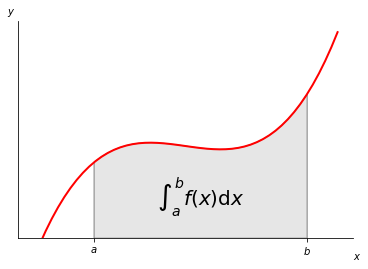

In [21]:
# %load http://matplotlib.org/mpl_examples/showcase/integral_demo.py
"""
Plot demonstrating the integral as the area under a curve.

Although this is a simple example, it demonstrates some important tweaks:

    * A simple line plot with custom color and line width.
    * A shaded region created using a Polygon patch.
    * A text label with mathtext rendering.
    * figtext calls to label the x- and y-axes.
    * Use of axis spines to hide the top and right spines.
    * Custom tick placement and labels.
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9  # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()


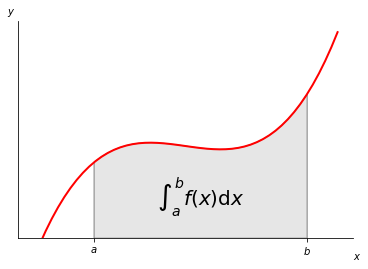

In [22]:
"""
Plot demonstrating the integral as the area under a curve.

Although this is a simple example, it demonstrates some important tweaks:

    * A simple line plot with custom color and line width.
    * A shaded region created using a Polygon patch.
    * A text label with mathtext rendering.
    * figtext calls to label the x- and y-axes.
    * Use of axis spines to hide the top and right spines.
    * Custom tick placement and labels.
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9 # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()
